<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Manual_Graded_Assignment_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This is a Python code cell
!apt-get install r-base


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [1]:
install.packages('astsa')
library(astsa)
install.packages('forecast')
library(forecast)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




In [2]:
install.packages('fUnitRoots')
library(fUnitRoots)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gss’, ‘stabledist’, ‘timeSeries’, ‘fBasics’




In [2]:
install.packages('pacman')
library(pacman)
p_load(astsa, fUnitRoots, forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **Introduction to the Dataset:**

**1. Brief summary of the dataset:**
The dataset analyzed in this report is the "chicken" dataset from the astsa package in R. This dataset contains time series data representing the values of a particular metric (e.g., production, sales, or prices related to chicken), recorded monthly over a span of multiple years.

**Structure of the Dataset:**
* Source: astsa package in R.
* Frequency: Monthly.
* Years Covered: 2001 (partial) to 2016 (partial), spanning 16 years in total. * Some months in 2001 and 2016 are missing.
* Number of Observations: 182 (16 years × 12 months, minus missing values).
* Range of Values:
  * Minimum: 61.49
  * Maximum: 116.00
  * Median: 85.03
  * Mean: 85.67
  * First Quartile (Q1): 72.42
  * Third Quartile (Q3): 96.04


**Dataset Overview in Table Format:**

\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\textbf{Year} & \textbf{Jan} & \textbf{Feb} & \textbf{Mar} & \textbf{Apr} & \textbf{May} & \textbf{Jun} & \textbf{Jul} & \textbf{Aug} & \textbf{Sep} & \textbf{Oct} & \textbf{Nov} & \textbf{Dec} \\
\hline
2001 & NA & NA & NA & NA & NA & NA & 65.58 & 66.48 & 65.70 & 64.33 & 63.23 & NA \\
2002 & 62.94 & 62.92 & 62.73 & 62.50 & 63.35 & 63.80 & 64.21 & 64.11 & 64.04 & 63.00 & 61.90 & 61.49 \\
2003 & 62.27 & 63.13 & 63.86 & 63.53 & 64.60 & 65.99 & 67.50 & 68.50 & 69.23 & 68.57 & 68.36 & 68.98 \\
...  & ...   & ...   & ...   & ...   & ...   & ...   & ...   & ...   & ...   & ...   & ...   & ...   \\
2016 & 112.52 & 112.10 & 111.56 & 111.55 & 111.98 & 111.84 & 111.46 & NA & NA & NA & NA & NA \\
\hline
\end{array}



**Initial Observations:**
* Trend: The dataset shows an overall upward trend over time.
* Seasonality: Monthly variations suggest a seasonal pattern (to be confirmed in further analysis).
* Missing Values: Missing values exist at the beginning (January–July 2001) and the end (August–December 2016) of the dataset.

This preliminary analysis sets the stage for a deeper exploration of trends, seasonality, and the application of ARIMA/SARIMA models for forecasting.



In [3]:
#Extracting the dataset from the astsa package in R.
data(chicken)
chicken

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,,,,,,,,65.58,66.48,65.70,64.33,63.23
2002,62.94,62.92,62.73,62.50,63.35,63.80,64.21,64.11,64.04,63.00,61.90,61.49
2003,62.27,63.13,63.86,63.53,64.60,65.99,67.50,68.50,69.23,68.57,68.36,68.98
2004,69.58,71.59,73.09,74.75,76.59,79.63,80.94,80.10,78.16,76.00,74.71,73.60
2005,73.44,73.75,73.88,74.00,74.29,74.48,74.75,74.77,75.19,74.38,72.69,71.21
2006,69.86,69.18,68.29,67.52,67.87,68.98,69.90,70.42,70.69,69.65,69.00,69.35
2007,71.33,73.77,76.37,78.10,79.52,80.75,81.17,81.27,81.55,79.75,77.77,76.85
2008,77.25,79.15,81.23,82.04,83.46,85.71,88.25,88.42,88.40,87.54,86.93,87.02
2009,87.25,86.70,85.73,85.38,86.96,88.17,88.56,86.77,84.88,82.85,82.13,82.15
2010,83.04,83.30,84.00,85.28,86.45,87.17,87.84,87.79,87.75,86.73,85.46,85.35


In [4]:
#Range of values:
summary(chicken)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  61.49   72.42   85.03   85.67   96.04  116.00 

**2. Initial Exploration**

**Plot the raw time series:**


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,,,,,,,,65.58,66.48,65.70,64.33,63.23
2002,62.94,62.92,62.73,62.50,63.35,63.80,64.21,64.11,64.04,63.00,61.90,61.49
2003,62.27,63.13,63.86,63.53,64.60,65.99,67.50,68.50,69.23,68.57,68.36,68.98
2004,69.58,71.59,73.09,74.75,76.59,79.63,80.94,80.10,78.16,76.00,74.71,73.60
2005,73.44,73.75,73.88,74.00,74.29,74.48,74.75,74.77,75.19,74.38,72.69,71.21
2006,69.86,69.18,68.29,67.52,67.87,68.98,69.90,70.42,70.69,69.65,69.00,69.35
2007,71.33,73.77,76.37,78.10,79.52,80.75,81.17,81.27,81.55,79.75,77.77,76.85
2008,77.25,79.15,81.23,82.04,83.46,85.71,88.25,88.42,88.40,87.54,86.93,87.02
2009,87.25,86.70,85.73,85.38,86.96,88.17,88.56,86.77,84.88,82.85,82.13,82.15
2010,83.04,83.30,84.00,85.28,86.45,87.17,87.84,87.79,87.75,86.73,85.46,85.35


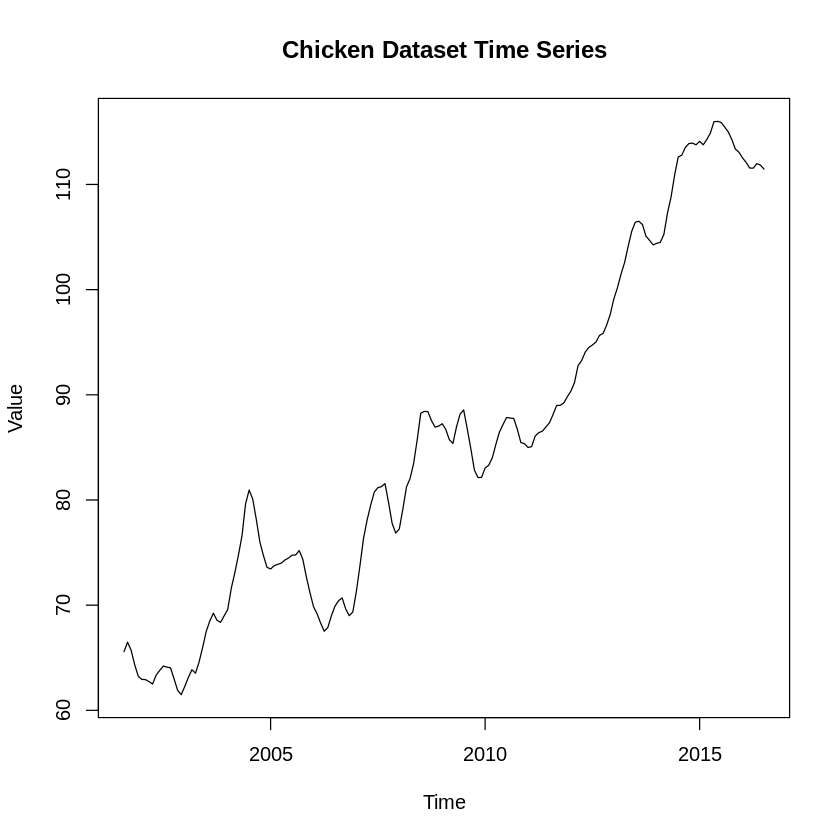

In [5]:
#Plot the raw time series:
chicken.ts <- ts(chicken, start = c(2001,8), end=c(2016,7), frequency = 12)
plot(chicken, main = "Chicken Dataset Time Series", ylab = "Value", xlab = "Time")

chicken.ts

**Initial Exploration of the Chicken Dataset**

**The time series plot of the Chicken dataset shows:**

* **Presence of a Trend:**

  * The plot exhibits a clear upward trend over time, indicating that the values are generally increasing from 2001 to 2016.
  * This suggests that the data is non-stationary due to the presence of a trend.

* **Evidence of Seasonality:**

  * There are signs of repeating fluctuations across several years, likely indicating seasonal patterns with a periodicity of 12 months (to be confirmed with further ACF and PACF plots).
  * The seasonality appears to be less pronounced in the earlier years and more noticeable in the later years, which could imply increasing seasonal variability.
* **Variability in the Data:**

  * The variance seems relatively stable over time, with no significant signs of heteroscedasticity (variance changes). However, any subtle changes in variability will need to be confirmed statistically.

**Stationarity Check**

* **Visual Check for Stationarity:**

  * The presence of an upward trend and possible seasonality suggests that the series is not stationary in its raw form.
  * Differencing (e.g., seasonal differencing with lag = 12) will likely be required to remove these components and stabilize the mean.

* **Next Steps:**

  * Conduct seasonal differencing to address seasonality and Dickey-Fuller tests to confirm whether the differenced data becomes stationary.
  * Use ACF and PACF plots of the differenced data to further investigate seasonal and non-seasonal components.
  
This initial exploration highlights the need for additional preprocessing steps to ensure the data is ready for ARIMA/SARIMA modeling.

In [6]:
# Run augmented Dickey--Fuller Test for ct, nc, and c:
Y<-(length(chicken.ts)-1)^(1/3)
Y
chicken_with_ct<- adfTest(chicken, 'ct', lag = 5)
chicken_with_ct

[1] 5.635741


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: -2.3955
  P VALUE:
    0.4109 

Description:
 Sat Nov 30 01:38:09 2024 by user: 

In [7]:
chicken_with_nc<- adfTest(chicken.ts, 'nc', lag = 5)
chicken_with_nc

Warning message in adfTest(chicken.ts, "nc", lag = 5):
“p-value greater than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: 2.0319
  P VALUE:
    0.99 

Description:
 Sat Nov 30 01:38:10 2024 by user: 

In [8]:
chicken_with_c<- adfTest(chicken.ts, 'c', lag = 5)

chicken_with_c


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: -0.4599
  P VALUE:
    0.8852 

Description:
 Sat Nov 30 01:38:12 2024 by user: 

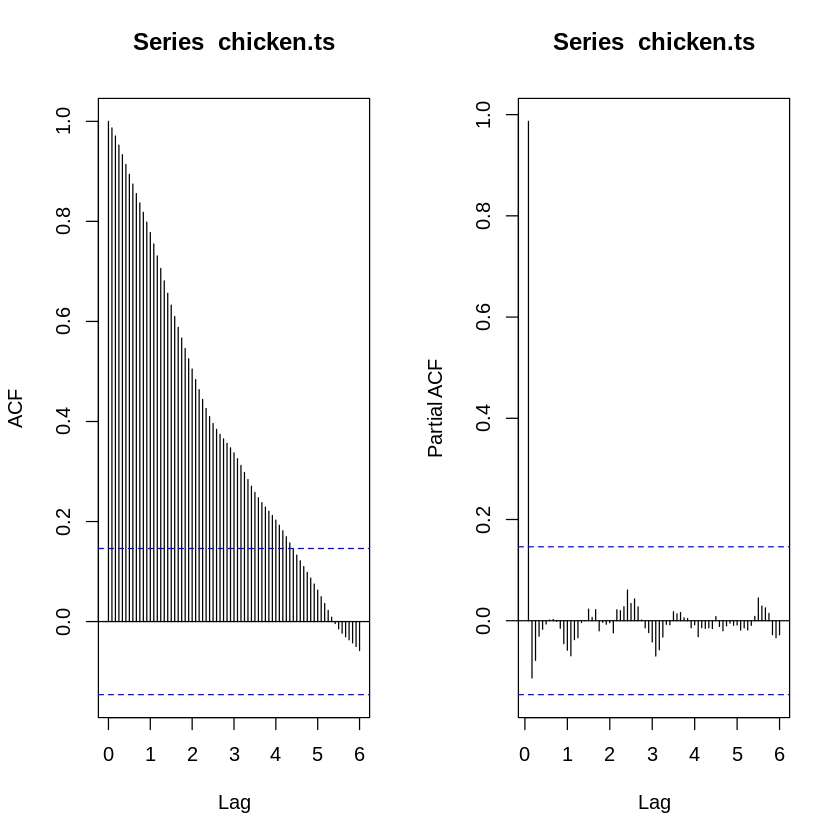

In [9]:
#Plotting the non-stationarity ACF and PACF plots
par(mfrow=c(1,2))
acf(chicken.ts, lag.max=72)
pacf(chicken.ts, lag.max=72)

**Summary of Current Analysis of chicken.ts (Initial):**

* **Visual Inspection:**

  * The time series plot of chicken.ts shows a strong upward trend, suggesting non-stationarity.
  * The ACF plot decays very slowly, further confirming the presence of non-stationarity.
  * PACF shows some sharp initial lags, which is indicative of the potential for AR terms in the model.

* **Dickey-Fuller Test Results:**

  * With Trend (ct): p-value = 0.4109 -> Fails to reject the null hypothesis of non-stationarity.
  * Without Constant (nc): p-value = 0.99 -> Fails to reject the null hypothesis of non-stationarity.
  * With Constant (c): p-value = 0.8852 -> again fails to reject the null hypothesis of non-stationarity.

  * **These results collectively indicate that the series is non-stationary and needs differencing (and possibly seasonal differencing) to achieve stationarity.**


* **ACF and PACF Observations (Raw Data):**

  * ACF: Strong decay over multiple lags, suggesting the presence of a trend.
Seasonal spikes are evident (periodicity = 12 months), indicating seasonality in the dataset.
  * PACF shows some initial significant lags, hinting at potential autoregressive structure.


**Conclusion:**  The Dickey-Fuller Test, ACF and PACF further confirm the presence of a trend and seasonality, and suggest the need for seasonal differencing to achieve stationarity with log transformation first.



**Planned Next Steps:**

**Step-01: Log Transformation:**
  * It seems the variability in the series appears to grow with the level of the data, apply a logarithmic transformation to stabilize variance.
  * Perform Dickey-Fuller tests (ct, c, nc) on the log transformed series (chicken.diff) to confirm stationarity.
  * Plot the log-transformed series and inspect for trends or seasonality.

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,,,,,,,,4.183271,4.196901,4.185099,4.164026,4.146779
2002,4.142182,4.141864,4.138840,4.135167,4.148675,4.155753,4.162159,4.160600,4.159508,4.143135,4.125520,4.118875
2003,4.131480,4.145196,4.156693,4.151512,4.168214,4.189503,4.212128,4.226834,4.237434,4.227855,4.224788,4.233817
2004,4.242477,4.270955,4.291692,4.314149,4.338467,4.377391,4.393708,4.383276,4.358758,4.330733,4.313614,4.298645
2005,4.296469,4.300681,4.302442,4.304065,4.307976,4.310531,4.314149,4.314417,4.320018,4.309187,4.286204,4.265633
2006,4.246493,4.236712,4.223763,4.212424,4.217594,4.233817,4.247066,4.254477,4.258304,4.243483,4.234107,4.239166
2007,4.267317,4.300952,4.335590,4.357990,4.376009,4.391358,4.396546,4.397777,4.401216,4.378897,4.353756,4.341855
2008,4.347047,4.371345,4.397285,4.407207,4.424367,4.450970,4.480174,4.482098,4.481872,4.472096,4.465103,4.466138
2009,4.468778,4.462454,4.451203,4.447112,4.465448,4.479267,4.483680,4.463261,4.441238,4.417032,4.408303,4.408547
2010,4.419322,4.422449,4.430817,4.445940,4.459566,4.467860,4.475517,4.474948,4.474492,4.462800,4.448048,4.446760


[1] 5.635741


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: -2.7479
  P VALUE:
    0.2637 

Description:
 Sat Nov 30 01:38:19 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: -0.7577
  P VALUE:
    0.7746 

Description:
 Sat Nov 30 01:38:19 2024 by user: 

Warning message in adfTest(log_chicken, "nc", lag = 5):
“p-value greater than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: 2.0826
  P VALUE:
    0.99 

Description:
 Sat Nov 30 01:38:19 2024 by user: 

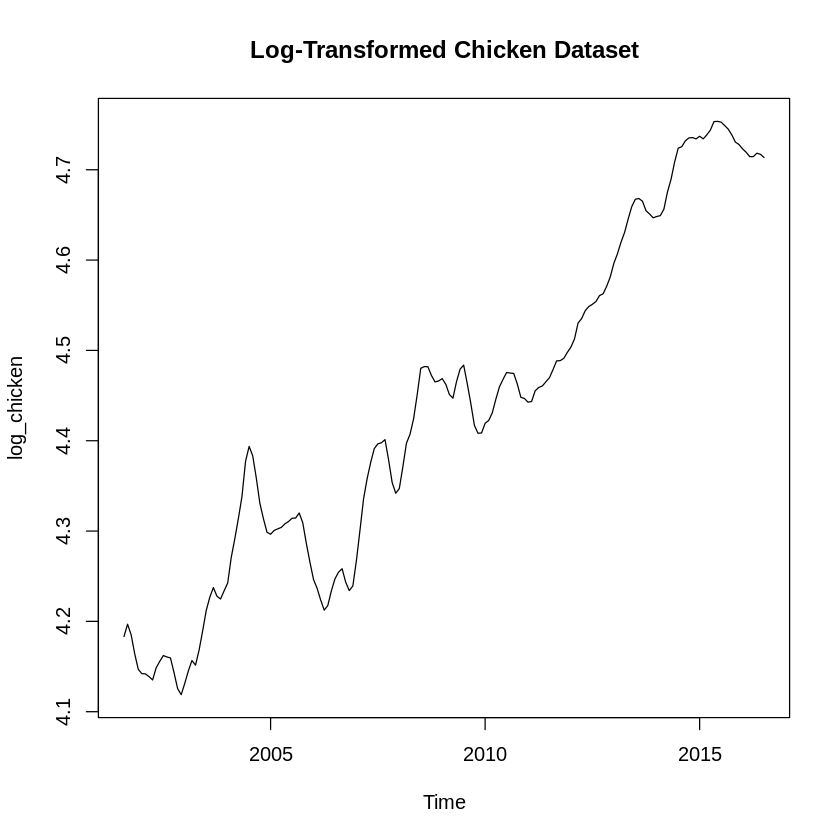

In [10]:
#Step-01: Log Transformation:
log_chicken <- log(chicken.ts)
log_chicken
plot(log_chicken, main = "Log-Transformed Chicken Dataset")
Y<-(length(log_chicken)-1)^(1/3)
Y
adfTest(log_chicken, 'ct', lag = 5)
adfTest(log_chicken, 'c', lag = 5)
adfTest(log_chicken, 'nc', lag = 5)

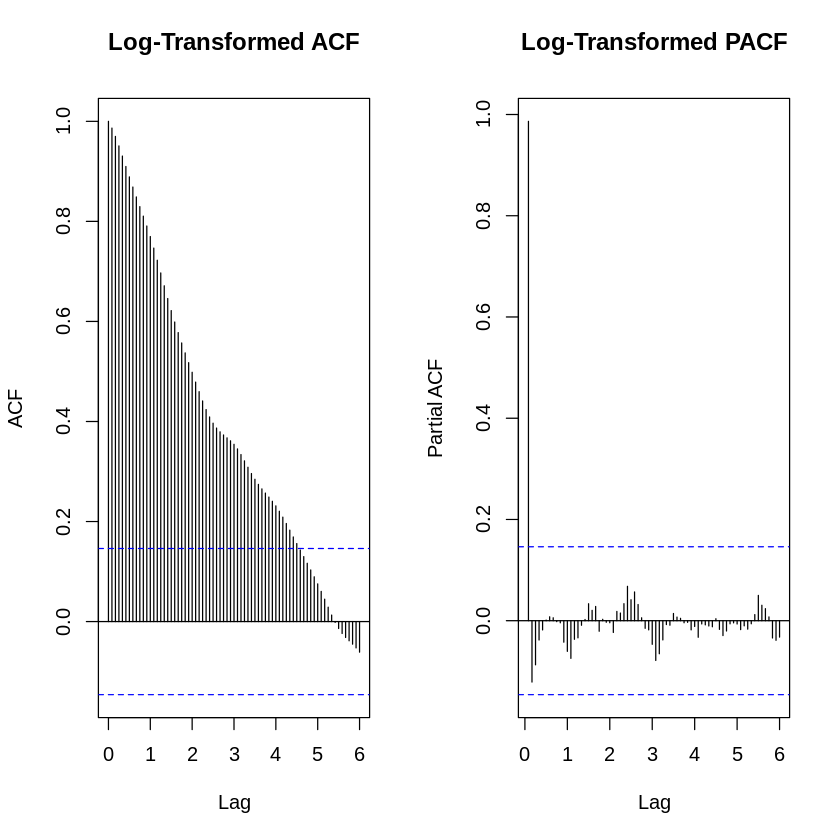

In [11]:
#Step-01: Log Transformation ACF and PACF plots:
#Plotting the ACF and PACF plots for log transformed data
par(mfrow=c(1,2))
acf(log_chicken, main = "Log-Transformed ACF", lag.max=72)
pacf(log_chicken,main = "Log-Transformed PACF", lag.max=72)

**Log-Transformed Step-01 Resuls summary:**

* Trend: The upward trend is still present after applying the logarithmic transformation.
* Variance: The variability seems to be stabilized across the time series. Log transformation generally helps reduce heteroscedasticity (variance depending on the level of the data), and this is apparent here as the variance appears more consistent over time compared to the original plot.
* Purpose of Transformation: The log transformation was effective in reducing variance but did not eliminate the upward trend and P values are still higher that results fails to reject the null hypothesis of non-stationarity.
* ACF and PACF log transformed plots are not much different than the original plots. I don't find much difference between the log and original plots.
* Thus, additional differencing (e.g., seasonal differencing) may still be required to address the trend and make the series stationary.

**Step-02: Seasonal Differencing:**

  * Since the data appears to have a seasonal component (frequency = 12), perform a seasonal differencing (diff(chicken.ts, lag=12)).
  * This will remove the seasonal pattern. Plot the differenced series to inspect for residual trends or seasonality.

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2002,,,,,,,,-0.022670413,-0.037393262,-0.041964199,-0.038505906,-0.027904312
2003,-0.010702123,0.003332014,0.017853385,0.016345679,0.019539504,0.033750025,0.049968636,0.066233387,0.077926407,0.084720395,0.099267679,0.114942048
2004,0.110997401,0.125759307,0.134998371,0.162636977,0.170252109,0.187887691,0.181580542,0.156442109,0.121323713,0.102878219,0.088826094,0.064828418
2005,0.053991577,0.029725596,0.010750597,-0.010084119,-0.030490167,-0.066860273,-0.079558927,-0.068859119,-0.038739764,-0.021546252,-0.027410128,-0.033011768
2006,-0.049975507,-0.063969192,-0.078678812,-0.091641243,-0.090382242,-0.076714025,-0.067083563,-0.059939421,-0.061714123,-0.065704388,-0.052097319,-0.026467111
2007,0.020823757,0.064240341,0.111826606,0.145566207,0.158414452,0.157541355,0.149480072,0.143299631,0.142912209,0.135414041,0.119649248,0.102689323
2008,0.079729919,0.070392641,0.061694688,0.049216876,0.048358913,0.059611543,0.083627975,0.084321244,0.080655641,0.093199090,0.111347444,0.124282507
2009,0.121730645,0.091109097,0.053918186,0.039904948,0.041080768,0.028297264,0.003506593,-0.018837249,-0.040633475,-0.055064088,-0.056799839,-0.057591133
2010,-0.049455142,-0.040005335,-0.020386024,-0.001171921,-0.005882031,-0.011406534,-0.008163311,0.011686659,0.033253368,0.045768101,0.039745072,0.038213605
2011,0.023328837,0.021025898,0.024460298,0.013047715,0.001040523,-0.002642009,-0.005708430,0.003865398,0.013919763,0.025836525,0.043168876,0.051047218


[1] 0.04054051

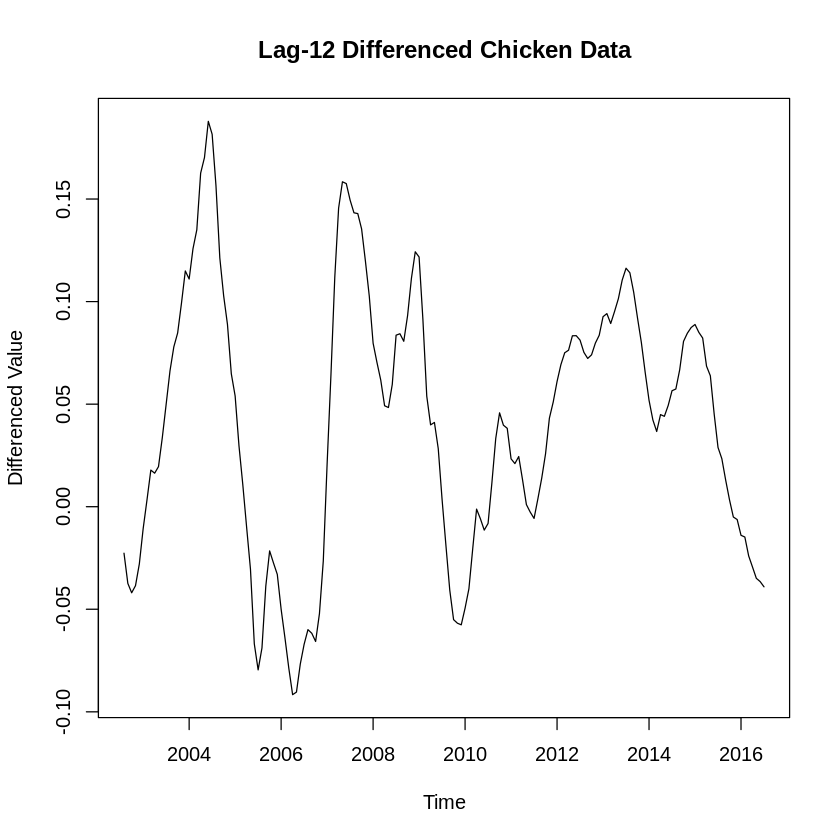

In [12]:
# Step-02: Seasonal Differencing
chicken.diff <- diff(log_chicken, lag = 12)
chicken.diff
mean(chicken.diff)
plot(chicken.diff, main = "Lag-12 Differenced Chicken Data", ylab = "Differenced Value", xlab = "Time")


Summary for the **Step-02** Seasonal Differencing Plot and Readings:

* **Observations from the Plot:**
  * **Seasonality Removed:** The Lag-12 differencing has successfully removed the apparent seasonality in the original data. The repetitive patterns observed in the original series are no longer visible.

  * **Trend Stabilization:** While the long-term trend appears reduced, there are still fluctuations in the differenced series, suggesting that additional differencing (if necessary) might be minimal.

  * **Stationarity Evidence:** The series exhibits a mean that is close to zero (as evident from the tabulated results). While the differencing has stabilized the series, further statistical tests such as the Augmented Dickey-Fuller (ADF) test should confirm stationarity.

* **Observations from the Tabulated Differenced Data:**
  * The values fluctuate around 0, which is expected after removing seasonal components.
  * The series is less dominated by upward or downward trends compared to the original series.
  * The differenced values for earlier years (e.g., 2002–2005) fluctuate more compared to the later years, indicating a possible stabilization as the series progresses.


**Step-03: Stationarity Check After Differencing:**

* Perform Dickey-Fuller tests (ct, c, nc) on the differenced series (chicken.diff) to confirm stationarity.
* Check whether the p-values fall below the significance threshold (0.05), which would confirm stationarity.

In [13]:
#Step-03: Stationarity Check After Differencing:
# Run augmented Dickey--Fuller Test
Y<-(length(chicken.diff)-1)^(1/3)
Y
adf_ct <- adfTest(chicken.diff, type = "ct", lag = 5)
adf_c <- adfTest(chicken.diff, type = "c", lag = 5)
adf_nc <- adfTest(chicken.diff, type = "nc", lag = 5)
print(adf_ct)
print(adf_c)
print(adf_nc)


[1] 5.506878

Warning message in adfTest(chicken.diff, type = "c", lag = 5):
“p-value smaller than printed p-value”
Warning message in adfTest(chicken.diff, type = "nc", lag = 5):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: -3.7939
  P VALUE:
    0.02099 

Description:
 Sat Nov 30 01:39:14 2024 by user: 

Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: -3.8257
  P VALUE:
    0.01 

Description:
 Sat Nov 30 01:39:14 2024 by user: 

Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: -3.0491
  P VALUE:
    0.01 

Description:
 Sat Nov 30 01:39:14 2024 by user: 


**Summary of Step-03 Stationarity Check After Differencing:**

* **Objective:**
The goal was to confirm the stationarity of the chicken.diff (Lag-12 differenced chicken dataset) using the Augmented Dickey-Fuller (ADF) test with three variations:

  * ct: Includes a constant and trend.
  * c: Includes only a constant.
  * nc: No constant or trend included.

* **Key Results:**
  * With Trend (ct):

    * Dickey-Fuller Statistic: -3.7939
    * p-value: 0.02099
  * Interpretation: The p-value is below the significance threshold of 0.05, allowing us to reject the null hypothesis of non-stationarity. This indicates stationarity under the assumption of a constant and trend.

  * With Constant Only (c):

    * Dickey-Fuller Statistic: -3.8257
    * p-value: 0.01
  * Interpretation: The p-value is below 0.05, allowing us to reject the null hypothesis. This confirms stationarity with a constant but no trend.

  * No Constant or Trend (nc):

    * Dickey-Fuller Statistic: -3.0491
    * p-value: 0.01
  * Interpretation: The p-value is below 0.05, indicating stationarity even when no constant or trend is included.

* **Key Takeaways:**
The chicken.diff series passes the stationarity check under all three test configurations (ct, c, and nc), as all p-values are below the threshold of 0.05.
Most Conservative Result: The test with a constant and trend (ct) yields the highest p-value (0.02099), which still confirms stationarity but is closest to the threshold.

* **Implications:**
No further differencing is required, as the differenced series is stationary.
We can proceed to the next steps of model identification using the ACF and PACF plots of the differenced data to select AR and MA orders for the ARIMA/SARIMA model.

**Step-04: Examine Differenced ACF/PACF Plots:**

  * Plot the ACF and PACF of the differenced series to identify the potential order of AR and MA terms.
  * Look for spikes at seasonal lags (12, 24, etc.) and non-seasonal components.

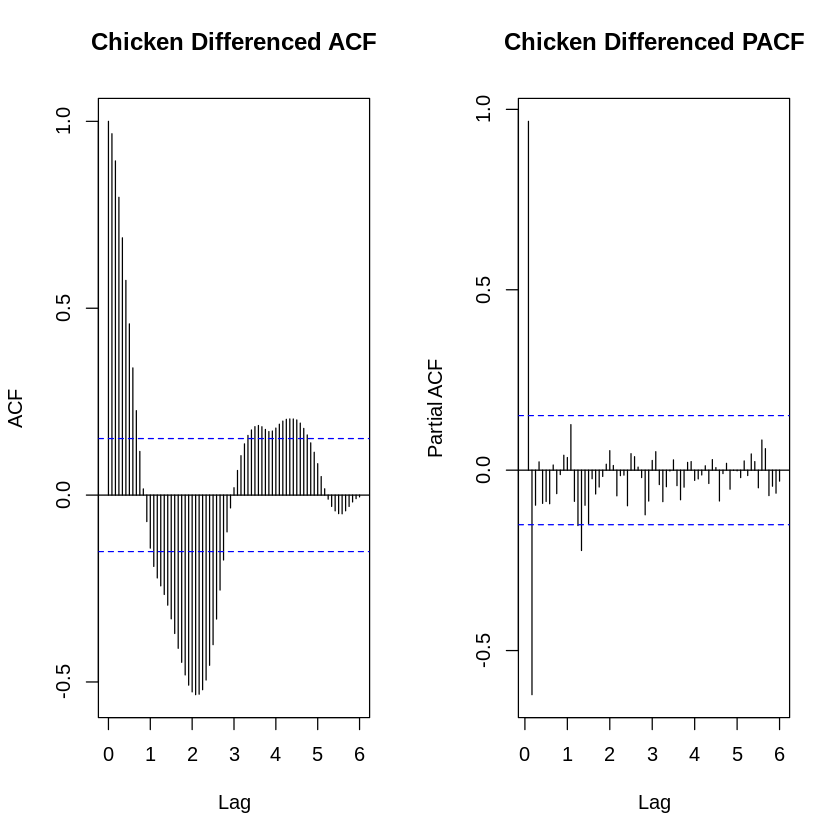

In [14]:
#Step-04 Examine Differenced ACF/PACF Plots:
par(mfrow=c(1,2))
acf(chicken.diff,main = "Chicken Differenced ACF", lag.max=72)
pacf(chicken.diff, main = "Chicken Differenced PACF",lag.max=72)

** Step-04: Summary of Differenced ACF and PACF Plots Analysis:**

* **Overview of Plots:**
  * The ACF plot shows a strong seasonal pattern, with significant spikes at lags that are multiples of 12 (e.g., lag 12 and 24). This suggests a seasonal component in the data, which has not been completely removed by the seasonal differencing.
  * The PACF plot shows a sharp spike at lag 1, followed by gradual decay, and seasonal spikes at lags such as 12 and 24, indicating the presence of both non-seasonal and seasonal dependencies.

* **Interpretation of ACF:**
  * The ACF shows significant positive autocorrelation at lag 12, followed by decay.
  * This suggests that a seasonal moving average (SMA) component may be required in the SARIMA model.
* **Interpretation of PACF:**
  * The sharp spike at lag 1 in the PACF suggests the potential inclusion of a non-seasonal autoregressive (AR) term.
  * Seasonal spikes in the PACF at lags 12 and 24 suggest the potential inclusion of a seasonal autoregressive (SAR) term.

* **Implications for Model Selection:** Based on the ACF and PACF plots, the following terms may be considered in a SARIMA model:

  * Non-Seasonal Terms:
    * AR order (p): Likely 1, due to the significant PACF spike at lag 1.
    * MA order (q): To be explored based on auto.arima results or further diagnostics.
  * Seasonal Terms:
    * Seasonal AR (P): Likely 1, due to the PACF spike at lag 12.
    * Seasonal MA (Q): Likely 1, due to the ACF spike at lag 12.
    * Seasonal differencing order (D): Already applied with lag 12.

* **Next Steps:**
Use auto.arima() to validate the suggested terms and compare AIC/AICC values for various models.
Perform residual diagnostics (e.g., check residuals for independence and normality) to confirm model adequacy.

**Step-05: Model Fitting:**

* Use auto.arima with trace=TRUE, allowdrift=FALSE, and appropriate parameters based on the differenced data.
* Compare models suggested by auto.arima to identify the best-fitting ARIMA or SARIMA model based on AIC, AICc, and BIC.

In [15]:

auto.arima(chicken.diff, allowdrift = FALSE,trace = TRUE,stationary = TRUE, approximation = FALSE)

# Refer to model2 for diagnostic check in Sarima.


 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : -1157.184
 ARIMA(0,0,0)            with non-zero mean : -442.3367
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : -962.1193
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,0)            with zero mean     : -387.8359
 ARIMA(2,0,2)(0,0,1)[12] with non-zero mean : Inf
 ARIMA(2,0,2)(1,0,0)[12] with non-zero mean : -1114.392
 ARIMA(2,0,2)(2,0,1)[12] with non-zero mean : -1162.156
 ARIMA(2,0,2)(2,0,0)[12] with non-zero mean : -1137.937
 ARIMA(2,0,2)(2,0,2)[12] with non-zero mean : -1164.327
 ARIMA(2,0,2)(1,0,2)[12] with non-zero mean : -1156.062
 ARIMA(1,0,2)(2,0,2)[12] with non-zero mean : -1158.008
 ARIMA(2,0,1)(2,0,2)[12] with non-zero mean : -1162.746
 ARIMA(3,0,2)(2,0,2)[12] with non-zero mean : -1162.177
 ARIMA(2,0,3)(2,0,2)[12] with non-zero mean : -1162.703
 ARIMA(1,0,1)(2,0,2)[12] with non-zero mean : -1122.453
 ARIMA(1,0,3)(2,0,2)[12] with non-zero mean : -1162.356
 ARIMA(3,0,1)(2,0,2)[12] with non-zero mean : -1161.398
 AR

Series: chicken.diff 
ARIMA(2,0,2)(2,0,2)[12] with non-zero mean 

Coefficients:
         ar1      ar2     ma1     ma2    sar1     sar2     sma1    sma2    mean
      1.4163  -0.4620  0.4063  0.2555  0.4071  -0.3330  -1.2514  0.5335  0.0410
s.e.  0.1366   0.1342  0.1426  0.1139  0.2235   0.1021   0.2312  0.1979  0.0057

sigma^2 = 4.714e-05:  log likelihood = 592.86
AIC=-1165.73   AICc=-1164.33   BIC=-1134.49

In [16]:

auto.arima(chicken.diff, allowdrift = FALSE,trace = TRUE,stationary = TRUE)
# Refer to model3 for diagnostic check in Sarima.


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : -1147.92
 ARIMA(0,0,0)            with non-zero mean : -442.3367
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : -962.2936
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : -689.5449
 ARIMA(0,0,0)            with zero mean     : -387.8359
 ARIMA(2,0,2)(0,0,1)[12] with non-zero mean : Inf
 ARIMA(2,0,2)(1,0,0)[12] with non-zero mean : -1113.858
 ARIMA(2,0,2)(2,0,1)[12] with non-zero mean : -1178.993
 ARIMA(2,0,2)(2,0,0)[12] with non-zero mean : -1172.645
 ARIMA(2,0,2)(2,0,2)[12] with non-zero mean : -1186.703
 ARIMA(2,0,2)(1,0,2)[12] with non-zero mean : -1153.421
 ARIMA(1,0,2)(2,0,2)[12] with non-zero mean : -1158.59
 ARIMA(2,0,1)(2,0,2)[12] with non-zero mean : -1188.126
 ARIMA(2,0,1)(1,0,2)[12] with non-zero mean : -1153.959
 ARIMA(2,0,1)(2,0,1)[12] with non-zero mean : -1178.167
 ARIMA(2,0,1)(1,0,1)[12] with non-zero mean : -1146.902
 ARIMA(1,0,1)(2,0,2)[12] with non-zero mean : -1137

Series: chicken.diff 
ARIMA(2,0,1)(2,0,2)[12] with non-zero mean 

Coefficients:
         ar1      ar2     ma1    sar1     sar2     sma1    sma2    mean
      1.6201  -0.6570  0.1722  0.4486  -0.3017  -1.2986  0.5636  0.0412
s.e.  0.0733   0.0733  0.0900  0.2257   0.1058   0.2326  0.1958  0.0052

sigma^2 = 4.792e-05:  log likelihood = 590.94
AIC=-1163.88   AICc=-1162.75   BIC=-1135.77

In [17]:

auto.arima(chicken.ts, trace = TRUE, allowdrift = FALSE, approximation = FALSE)
# Refer to model1 for diagnostic check in Sarima.


 ARIMA(2,1,2)(1,0,1)[12]                    : Inf
 ARIMA(0,1,0)                               : 521.5318
 ARIMA(1,1,0)(1,0,0)[12]                    : 356.2041
 ARIMA(0,1,1)(0,0,1)[12]                    : 402.1189
 ARIMA(1,1,0)                               : 380.5199
 ARIMA(1,1,0)(2,0,0)[12]                    : 355.1769
 ARIMA(1,1,0)(2,0,1)[12]                    : Inf
 ARIMA(1,1,0)(1,0,1)[12]                    : Inf
 ARIMA(0,1,0)(2,0,0)[12]                    : 495.0892
 ARIMA(2,1,0)(2,0,0)[12]                    : 347.6443
 ARIMA(2,1,0)(1,0,0)[12]                    : 347.8974
 ARIMA(2,1,0)(2,0,1)[12]                    : Inf
 ARIMA(2,1,0)(1,0,1)[12]                    : Inf
 ARIMA(3,1,0)(2,0,0)[12]                    : 348.724
 ARIMA(2,1,1)(2,0,0)[12]                    : 349.1905
 ARIMA(1,1,1)(2,0,0)[12]                    : 350.0006
 ARIMA(3,1,1)(2,0,0)[12]                    : 351.228

 Best model: ARIMA(2,1,0)(2,0,0)[12]                    



Series: chicken.ts 
ARIMA(2,1,0)(2,0,0)[12] 

Coefficients:
         ar1      ar2    sar1    sar2
      0.9137  -0.2325  0.2990  0.1176
s.e.  0.0735   0.0739  0.0735  0.0759

sigma^2 = 0.3883:  log likelihood = -168.65
AIC=347.3   AICc=347.64   BIC=363.23

In [18]:

auto.arima(chicken.ts,allowdrift = FALSE, trace = TRUE)
# Refer to model4 for diagnostic check in Sarima.


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,0,1)[12]                    : Inf
 ARIMA(0,1,0)                               : 521.4674
 ARIMA(1,1,0)(1,0,0)[12]                    : 356.6436
 ARIMA(0,1,1)(0,0,1)[12]                    : 401.6451
 ARIMA(1,1,0)                               : 379.8951
 ARIMA(1,1,0)(2,0,0)[12]                    : 359.3998
 ARIMA(1,1,0)(1,0,1)[12]                    : Inf
 ARIMA(1,1,0)(0,0,1)[12]                    : 360.3604
 ARIMA(1,1,0)(2,0,1)[12]                    : Inf
 ARIMA(0,1,0)(1,0,0)[12]                    : 499.9586
 ARIMA(2,1,0)(1,0,0)[12]                    : 349.3437
 ARIMA(2,1,0)                               : 362.5743
 ARIMA(2,1,0)(2,0,0)[12]                    : 351.9146
 ARIMA(2,1,0)(1,0,1)[12]                    : Inf
 ARIMA(2,1,0)(0,0,1)[12]                    : 347.2674
 ARIMA(2,1,0)(0,0,2)[12]                    : 348.2304
 ARIMA(2,1,0)(1,0,2)[12]                    : Inf
 ARIMA(3,1,0)(0,0,1)[12]     

Series: chicken.ts 
ARIMA(3,1,0)(0,0,1)[12] 

Coefficients:
         ar1      ar2      ar3    sma1
      0.8982  -0.1416  -0.1255  0.2899
s.e.  0.0749   0.1005   0.0745  0.0676

sigma^2 = 0.3975:  log likelihood = -170.41
AIC=350.83   AICc=351.17   BIC=366.76

**Summary of All Models Step-05:**

**Results for chicken.diff (Stationary, Differenced Data)**

* **Best Model (Approximation=FALSE):**
  * Model: ARIMA(2,0,2)(2,0,2)[12] with non-zero mean
  * AIC: -1165.73
  * AICc: -1164.33
  * BIC: -1134.49
  * Residual Variance: σ2 = 4.714×10−5

* **Alternative Model (With Approximation):**
  * Model: ARIMA(2,0,1)(2,0,2)[12] with non-zero mean
  * AIC: -1163.88
  * AICc: -1162.75
  * BIC: -1135.77
  * Residual Variance: σ 2 = 4.792×10−5

**Results for chicken.ts (Original Time Series):**

* **Best Model (Approximation=FALSE):**
  * Model: ARIMA(2,1,0)(2,0,0)[12]
  * AIC: 347.30
  * AICc: 347.64
  * BIC: 363.23
  * Residual Variance: σ2 = 0.3883

**Alternative Model (With Approximation):**
* Model: ARIMA(3,1,0)(0,0,1)[12]
  * AIC: 350.83
  * AICc: 351.17
  * BIC: 366.76
  * Residual Variance: σ2 = 0.3975


**Insights and Recommendations**

**Model Selection Criteria:**

* **AIC/AICc:** Lower values indicate better model fit. For **chicken.diff**, the best model is ARIMA(2,0,2)(2,0,2)[12] with the lowest AIC and AICc.

* **Residual Variance:** Indicates the model’s ability to minimize errors. The variance is lowest for ARIMA(2,0,2)(2,0,2)[12].

**Comparison Between Differenced and Original Data:**

**Differenced data (chicken.diff)** consistently yields better models (lower AIC and AICc) than the original time series (chicken.ts), confirming the necessity of differencing to achieve stationarity.


**Step-06: Diagnostics and Validation:**

* Perform diagnostics on the residuals of the fitted model (e.g., check for white noise using ACF/PACF and Ljung-Box tests).
Ensure that residuals show no significant autocorrelation.
Refinement:

* If residual diagnostics are not satisfactory, revisit the model structure (e.g., add/remove AR, MA, SAR, SMA terms) or consider additional transformations.

initial  value 0.026760 
iter   2 value -0.219326
iter   3 value -0.399602
iter   4 value -0.455859
iter   5 value -0.464618
iter   6 value -0.467738
iter   7 value -0.467753
iter   8 value -0.467755
iter   9 value -0.467756
iter  10 value -0.467759
iter  11 value -0.467761
iter  12 value -0.467762
iter  13 value -0.467762
iter  14 value -0.467762
iter  15 value -0.467762
iter  15 value -0.467762
iter  15 value -0.467762
final  value -0.467762 
converged
initial  value -0.478453 
iter   2 value -0.479400
iter   3 value -0.479451
iter   4 value -0.479458
iter   5 value -0.479468
iter   6 value -0.479480
iter   7 value -0.479487
iter   8 value -0.479489
iter   9 value -0.479489
iter   9 value -0.479489
iter   9 value -0.479489
final  value -0.479489 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ar1        0.9116 0.0733 12.4393  0.0000
ar2       -0.2393 0.0741 -3.2279  0.0015
sar1       0.2911 0.0739  3.9372  0.0001
sar2       0.1089 0.0

[1] 348.323

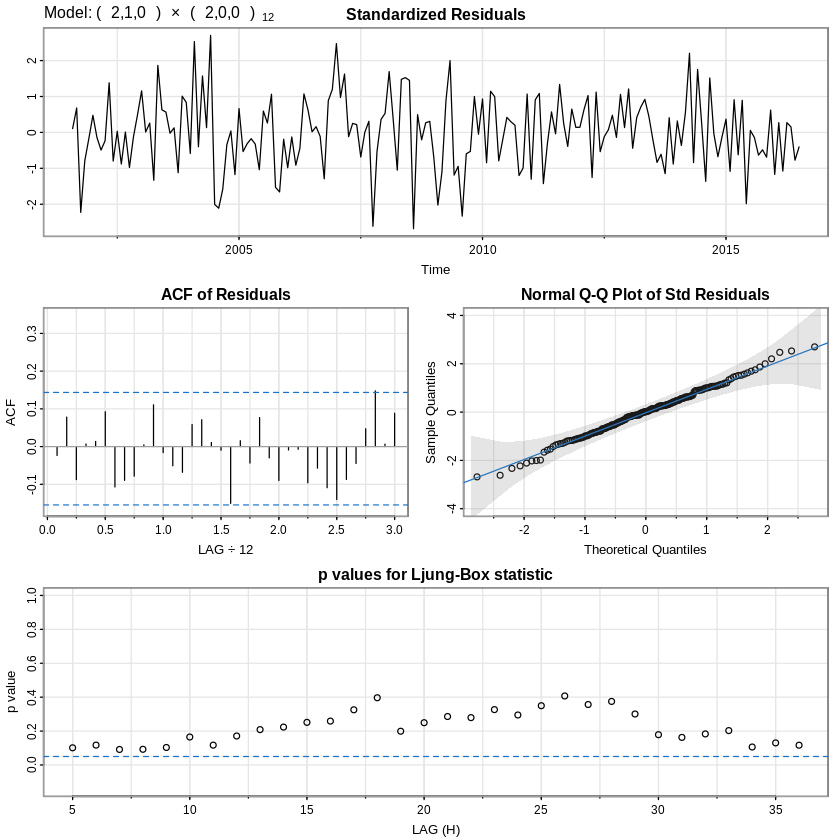

In [24]:
# Step-06 Try ARIMA on original data with approximation set to FALSE
model1<-sarima(chicken.ts, 2,1,0,2,0,0, 12)
model1$fit$aic



**Model1 original data summary Details:**

**Model1 Fitted Model: ARIMA(2,1,0)(2,0,0)[12]**

**Coefficients:**

  * AR(1): ϕ^1 = 0.9116 (p-value: <0.0001, significant)
  * AR(2): ϕ^2 = −0.2393 (p-value: 0.0015, significant)
  * Seasonal AR(1): Φ^1 = 0.2911 (p-value: <0.0001, significant)
  * Seasonal AR(2): Φ^2 = 0.1089 (p-value: 0.1563, not significant)
  * Constant: c^ = 0.2244 (p-value: 0.31, not significant)
  * Error Variance: 𝜎^2 = 0.3779
  * Model1 Selection Criteria:

    * AIC: 1.945939
    * AICc: 1.947876
    * BIC: 2.052778

**Equations:**
$$
\left(1 - 0.9116B + 0.2393B^2 \right)\left(1 - 0.2911B^{12} - 0.1089B^{24} \right)\left(X_t - X_{t-1} \right) = 0.2244 + \epsilon_t
$$


Where:

  * B: Backward shift operator (e.g., BXt​ = Xt−1).
  * Xt: Time series value at time t.
  * 𝜖𝑡: White noise residuals.



**ACF of Residuals:**
* The residual ACF shows no significant autocorrelation at any lag (all points are within the blue significance bounds). This is a good indication that the residuals behave like white noise.

**Normal Q-Q Plot:**
* The residuals follow a straight line in the Q-Q plot, with minor deviations in the tails. These deviations are not unusual and suggest residual normality is approximately satisfied.

**Ljung–Box Test:**
* All p-values for the Ljung–Box test are above the threshold (e.g., 0.05).
* This indicates no significant autocorrelation in the first H lags of residuals.
* All P values on Ljung-Box table is above the threshold line.

**Interpretation and Conclusion:**

* Model1 Diagnostics: The model1 diagnostics confirm that the ARIMA(2,1,0)(2,0,0)[12] model1 is satisfactory to me:

    * Residuals exhibit no significant autocorrelation.
    * Residuals are approximately normally distributed.
    * Ljung–Box tests provide no evidence against the null hypothesis of no autocorrelation.

**Key Strengths of This Model1:**

* It successfully captures the seasonal and non-seasonal components of the data.

**Potential Improvements:**

The Seasonal AR(2) and constant term are not significant (p > 0.1). Simplifying the model by removing these terms could slightly improve interpretability without compromising performance.

initial  value -2.796266 
iter   2 value -3.600523
iter   3 value -3.782351
iter   4 value -4.178460
iter   5 value -4.610484
iter   6 value -4.778411
iter   7 value -4.810660
iter   8 value -4.862381
iter   9 value -4.892881
iter  10 value -4.928997
iter  11 value -4.959344
iter  12 value -4.987206
iter  13 value -4.999131
iter  14 value -5.002779
iter  15 value -5.007950
iter  16 value -5.011318
iter  17 value -5.013523
iter  18 value -5.014204
iter  19 value -5.014387
iter  20 value -5.014444
iter  21 value -5.014483
iter  22 value -5.014488
iter  23 value -5.014488
iter  23 value -5.014488
final  value -5.014488 
converged
initial  value -4.898686 
iter   2 value -4.909904
iter   3 value -4.918417
iter   4 value -4.920035
iter   5 value -4.920566
iter   6 value -4.921086
iter   7 value -4.921655
iter   8 value -4.922234
iter   9 value -4.922844
iter  10 value -4.923611
iter  11 value -4.925493
iter  12 value -4.927533
iter  13 value -4.931502
iter  14 value -4.935264
iter  15 value

[1] -1165.728

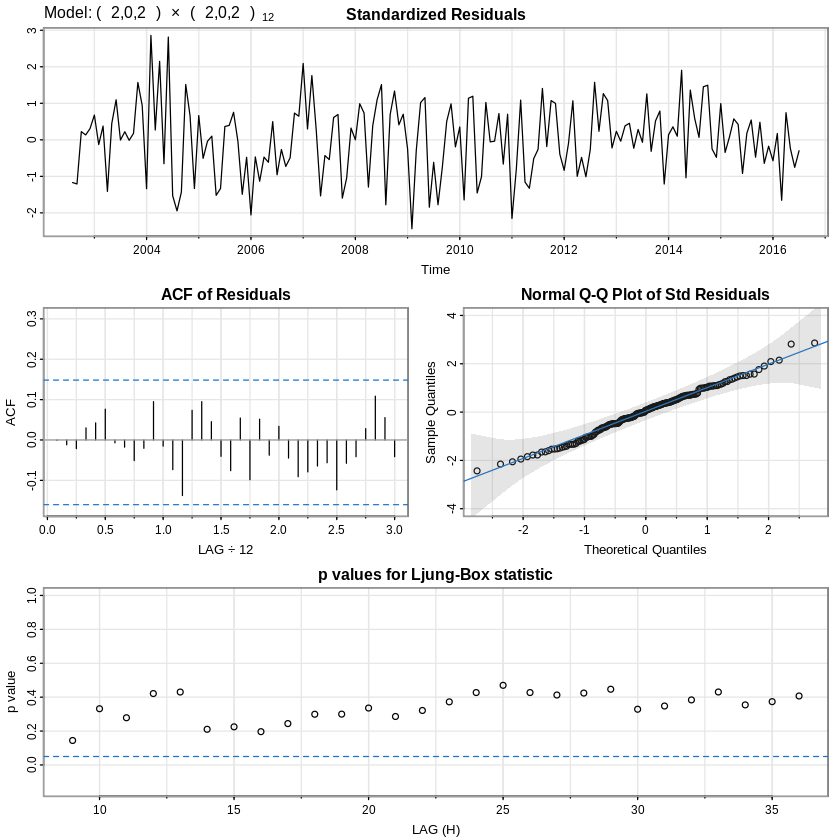

In [21]:
# Step-06 Try ARIMA(2,0,2)(2,0,2)[12] on differenced data with approximation set to FALSE
model2<-sarima(chicken.diff, 2,0,2,2,0,2, 12)
model2$fit$aic



**Summary of Model2 ARIMA(2,0,2)(2,0,2)[12] Model on Differenced Data:**

**Fitted Model: ARIMA(2,0,2)(2,0,2)[12**]

**Coefficients:**

* AR Terms:
  * AR(1): 𝜙^1 = 1.4163 (p-value: <0.0001, significant)
  * AR(2): 𝜙^2 = −0.4620 (p-value: 0.0007, significant)
* MA Terms:
  * MA(1): 𝜃^1 = 0.4063 (p-value: 0.0050, significant)
  * MA(2): 𝜃^2 = 0.2555 (p-value: 0.0262, significant)
* Seasonal AR Terms:
  * Seasonal AR(1): Φ^1 = 0.4071 (p-value: 0.0704, borderline significant)
  * Seasonal AR(2): Φ^2 = −0.3330 (p-value: 0.0014, significant)
* Seasonal MA Terms:
  * Seasonal MA(1): Θ^1 = −1.2514 (p-value: <0.0001, significant)
  * Seasonal MA(2): Θ^2 = 0.5335 (p-value: 0.0078, significant)
* Mean: 𝜇^ = 0.0410 (p-value: <0.0001, significant)
* Error Variance: 𝜎^2 = 4.461×10−5


* Model2 Selection Criteria:
  * AIC: -6.93886
  * AICc: -6.932079
  * BIC: -6.75291


**Equations:**
$$
\left(1 - 1.4163B + 0.4620B^2 \right)\left(1 - 0.4071B^{12} + 0.3330B^{24} \right)X_t = \left(1 + 0.4063B + 0.2555B^2 \right)\left(1 - 1.2514B^{12} + 0.5335B^{24} \right)\epsilon_t + 0.0410
$$


Where:

  * B: Backward shift operator (e.g., BXt​ = Xt−1).
  * Xt: Time series value at time t.
  * 𝜖𝑡: White noise residuals.

**Diagnostics:**

**Standardized Residuals:**
* The standardized residuals appear stationary, with no discernible trends or patterns, suggesting the model2 has effectively captured the structure of the data.

**ACF of Residuals:**
* The residual ACF does not exhibit significant spikes at any lag, indicating no remaining autocorrelation in the residuals. This confirms that the model2 has adequately accounted for both seasonal and non-seasonal dependencies.

**Normal Q-Q Plot:**
* The Q-Q plot shows a reasonably straight line, with minor deviations at the tails. These deviations are within acceptable bounds and suggest approximate normality of residuals.

**Ljung–Box Test:**
* The Ljung–Box test p-values are consistently above the threshold of 0.05 for multiple lags (e.g., lag 12). This indicates no significant autocorrelation in the residuals.

**Interpretation and Conclusion:**

**Model2 Performance:**

* The ARIMA(2,0,2)(2,0,2)[12] model2 has strong statistical significance for most parameters, with only the Seasonal AR(1) being borderline significant.
* The residual diagnostics (ACF, Q-Q plot, and Ljung–Box test) indicate that the residuals behave like white noise and are approximately normally distributed.

**Key Strengths:**

* The model2 captures both non-seasonal (AR(2), MA(2)) and seasonal (Seasonal AR(2), Seasonal MA(2)) components effectively.
* Strong diagnostic results confirm the adequacy of the model2.

**Potential Areas for Improvement:**

* The borderline significance of Seasonal AR(1) (Φ^1) could be revisited to check whether its inclusion materially improves model2 fit. A simpler model may perform similarly well.

initial  value -0.002804 
iter   2 value -0.156142
iter   3 value -0.453800
iter   4 value -0.475604
iter   5 value -0.482271
iter   6 value -0.484790
iter   7 value -0.484902
iter   8 value -0.484904
iter   9 value -0.484905
iter  10 value -0.484906
iter  11 value -0.484906
iter  12 value -0.484906
iter  12 value -0.484906
final  value -0.484906 
converged
initial  value -0.474116 
iter   2 value -0.474256
iter   3 value -0.474263
iter   4 value -0.474263
iter   5 value -0.474263
iter   6 value -0.474263
iter   7 value -0.474263
iter   7 value -0.474263
iter   7 value -0.474263
final  value -0.474263 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ar1        0.8877 0.0746 11.8975  0.0000
ar2       -0.1402 0.0998 -1.4052  0.1618
ar3       -0.1383 0.0744 -1.8594  0.0647
sma1       0.2793 0.0691  4.0427  0.0001
constant   0.2505 0.1489  1.6826  0.0943

sigma^2 estimated as 0.3831089 on 174 degrees of freedom 
 
AIC = 1.95639  AICc = 1.958

[1] 350.1938

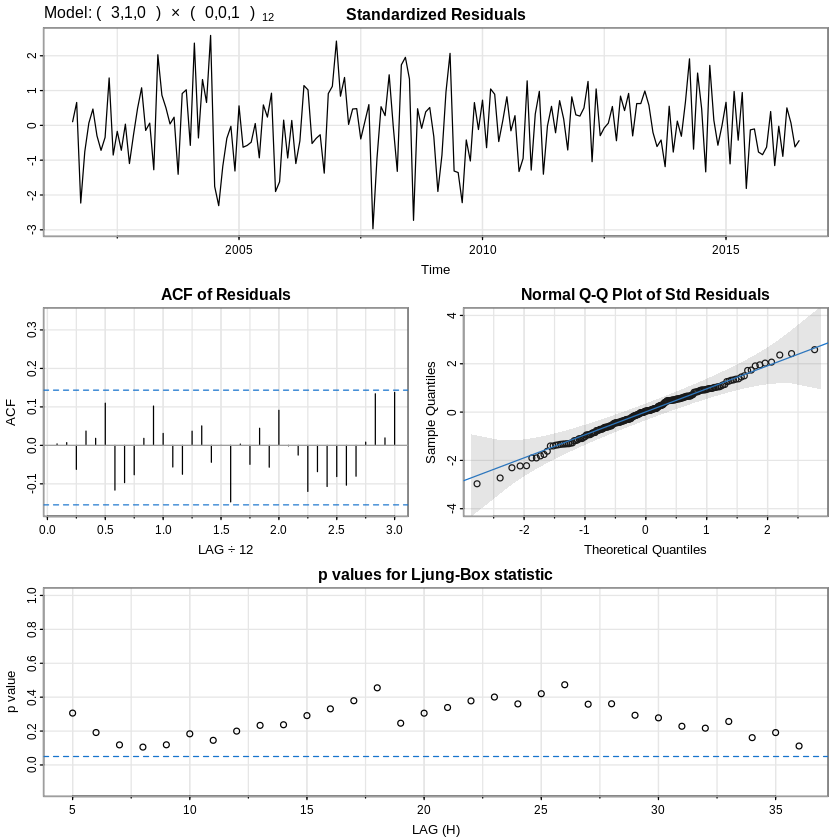

In [25]:
# Step-06 Try ARIMA on original data with approximation
model3<-sarima(chicken.ts, 3,1,0,0,0,1, 12)
model3$fit$aic

**Summary of ARIMA(3,1,0)(0,0,1)[12] Model3 on Original Data:**

**Model3 Details:**
**Fitted Model: ARIMA(3,1,0)(0,0,1)[12]:**

**Coefficients:**

* AR Terms:
  * AR(1): 𝜙^1 = 0.8877 (p-value: <0.0001, significant)
  * AR(2): 𝜙^2 = −0.1402 (p-value: 0.1618, not significant)
  * AR(3): 𝜙^3 = −0.1383 (p-value: 0.0647, borderline significant)
* Seasonal MA Term:
  * Seasonal MA(1): Θ^1 = 0.2793 (p-value: <0.0001, significant)
* Mean (Constant): 𝜇^ = 0.2505 (p-value: 0.0943, borderline significant)
* Error Variance: 𝜎^2 = 0.3831

* Model Selection Criteria:
  * AIC: 1.95639
  * AICc: 1.95833
  * BIC: 2.06323

**Equations:**
$$
\left(1 - 0.8877B + 0.1402B^2 + 0.1383B^3 \right)\left(1 - B\right)X_t = \left(1 - 0.2793B^{12} \right)\epsilon_t + 0.2505
$$


Where:

  * B: Backward shift operator (e.g., BXt​ = Xt−1).
  * Xt: Time series value at time t.
  * 𝜖𝑡: White noise residuals.

**Diagnostics:**

**Standardized Residuals:**
* The standardized residuals plot does not exhibit any significant trends or obvious deviations from stationarity, suggesting the model has captured the underlying structure well.

**ACF of Residuals:**
* The ACF plot shows no significant spikes, indicating that the residuals are white noise with no remaining autocorrelation.

**Normal Q-Q Plot:**
* The Q-Q plot shows a reasonably straight line, with minor deviations at the tails. These deviations are not extreme and suggest approximate normality of residuals.

**Ljung–Box Test:**

* The p-values for the Ljung–Box test statistic are consistently above 0.05 for multiple lags (e.g., lag 12), confirming no significant autocorrelation in the residuals.

**Interpretation and Conclusion:**

**Model Performance:**

* The ARIMA(3,1,0)(0,0,1)[12] model performs well in capturing the seasonality and trend of the original time series data.
* Residual diagnostics confirm that the residuals are approximately white noise, with no significant autocorrelation or deviations from normality.

**Key Strengths:**

* The ARIMA(3,1,0) part accounts for the trend effectively, while the seasonal MA(1) captures the seasonal dependence.
* The diagnostic checks (ACF, Q-Q plot, Ljung–Box test) indicate that the model adequately explains the data.

**Potential Areas for Improvement:**

* The AR(2) term is not statistically significant, and the AR(3) term is only borderline significant. A simpler model.
* This model was fit with approximation = TRUE, which is generally not recommended as it may reduce the accuracy of model selection and parameter estimation. Results should be interpreted with caution, and it is advisable to refit the model with approximation = FALSE to ensure robust parameter estimation and diagnostics

initial  value -2.796266 
iter   2 value -3.159649
iter   3 value -3.328177
iter   4 value -3.779857
iter   5 value -4.287370
iter   6 value -4.464389
iter   7 value -4.589447
iter   8 value -4.822460
iter   9 value -4.902030
iter  10 value -4.940968
iter  11 value -4.970601
iter  12 value -4.993729
iter  13 value -5.001101
iter  14 value -5.010043
iter  15 value -5.011375
iter  16 value -5.011793
iter  17 value -5.011863
iter  18 value -5.011970
iter  19 value -5.011986
iter  20 value -5.011989
iter  21 value -5.011991
iter  21 value -5.011991
final  value -5.011991 
converged
initial  value -4.888177 
iter   2 value -4.890201
iter   3 value -4.910160
iter   4 value -4.911799
iter   5 value -4.912348
iter   6 value -4.912552
iter   7 value -4.912690
iter   8 value -4.912837
iter   9 value -4.912954
iter  10 value -4.913206
iter  11 value -4.913633
iter  12 value -4.914167
iter  13 value -4.915600
iter  14 value -4.922760
iter  15 value -4.927240
iter  16 value -4.933750
iter  17 value

[1] -1163.885

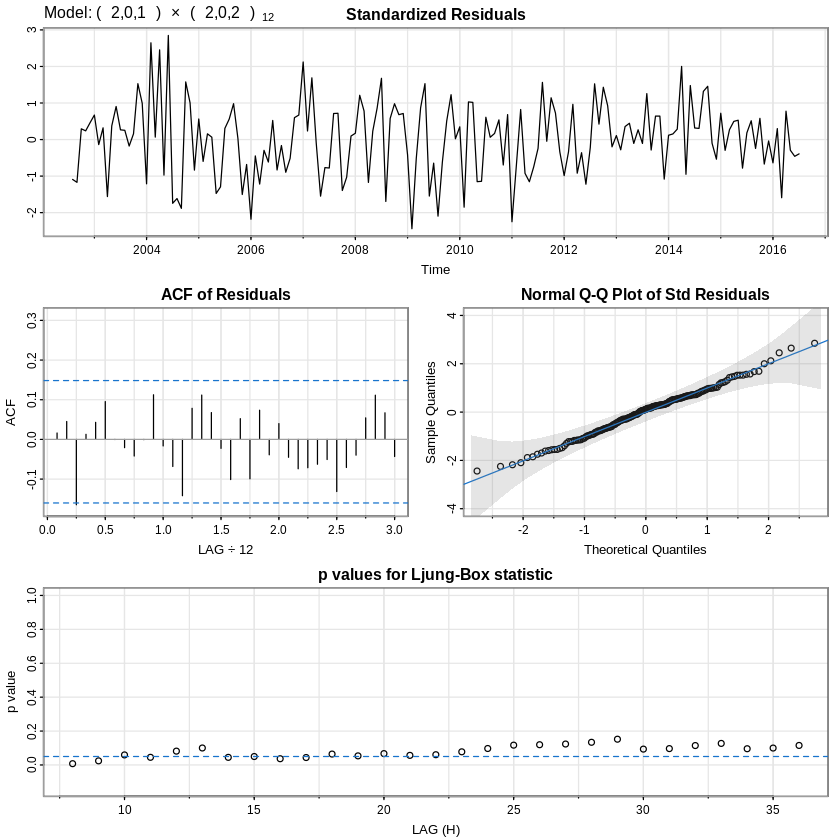

In [26]:
# Step-06 Try ARIMA(2,0,1)(2,0,2)[12] on differenced data with approximation
model4<-sarima(chicken.diff, 2,0,1,2,0,2,12)
model4$fit$aic

**Summary of ARIMA(2,0,1)(2,0,2)[12] Model4 on Differenced Data with Approximation:**

**Model4 Details:** **Fitted Model: ARIMA(2,0,1)(2,0,2)[12]**

**Coefficients:**

* AR Terms:
  * AR(1): 𝜙^1 = 1.6201 (p-value: <0.0001, significant)
  * AR(2): 𝜙^2 = −0.6570 (p-value: <0.0001, significant)
* MA Terms:
  * MA(1): 𝜃^1 = 0.1722 (p-value: 0.0576, borderline significant)
* Seasonal AR Terms:
  * SAR(1): Φ^1 = 0.4486 (p-value: 0.0486, significant)
  * SAR(2): Φ^2 = −0.3017 (p-value: 0.0049, significant)
* Seasonal MA Terms:
  * SMA(1): Θ^1 = −1.2986 (p-value: <0.0001, significant)
  * SMA(2): Θ^2 = 0.5636 (p-value: 0.0046, significant)
* Mean: 𝜇^ = 0.0412 (p-value: <0.0001, significant)
* Error Variance: 𝜎^2 = 4.5642 × 10−5

* Model Selection Criteria:

  * AIC: -6.92789
  * AICc: -6.922495
  * BIC: -6.760531

**Equations:**
$$
\left(1 - 1.6201B + 0.6570B^2 \right)\left(1 - 0.4486B^{12} + 0.3017B^{24} \right)X_t = \left(1 + 0.1722B \right)\left(1 - 1.2986B^{12} + 0.5636B^{24} \right)\epsilon_t + 0.0412
$$


Where:

  * B: Backward shift operator (e.g., BXt​ = Xt−1).
  * Xt: Time series value at time t.
  * 𝜖𝑡: White noise residuals.

**Diagnostics:**

**Standardized Residuals:**
* The standardized residuals plot does not show any visible trends or deviations, indicating the model effectively captures the data's structure.

**ACF of Residuals:**
* The ACF plot confirms that residual autocorrelation is minimal, with all spikes falling within the blue significance bounds.

**Normal Q-Q Plot:**
* The Q-Q plot suggests approximate normality of residuals, with minor deviations at the tails that are not unusual for real-world data.

**Ljung–Box Test:**
The p-values for the Ljung–Box statistic are consistently below the threshold line indicating significant residual autocorrelation.

**Interpretation:**

**Model Performance:**

* The ARIMA(2,0,1)(2,0,2)[12] model performs well in capturing both seasonal and non-seasonal dependencies in the differenced data.
* Diagnostic checks confirm that the residuals are approximately white noise with no significant autocorrelation or major departures from normality.

**Key Observations:**

* The AR(1) and AR(2) terms are highly significant and effectively capture the autoregressive nature of the series.
* The seasonal components (SAR and SMA) also play a crucial role, capturing the seasonality well.
* The MA(1) term has a borderline significant p-value, which might indicate it could be excluded in a simpler model.

**Important Note:**

* This model was fit with approximation = TRUE, which is generally not recommended as it may reduce the accuracy of model selection and parameter estimation. Results should be interpreted with caution, and it is advisable to refit the model with approximation = FALSE to ensure robust parameter estimation and diagnostics.

**Model Comparison and Recommendation**

After analyzing and summarizing the four models fitted on the given data (original or differenced), here is a detailed evaluation and the final recommendation for the best model.

**Criteria for Model Selection** The following criteria were used to identify the best model:

**Model Fit (AIC, AICc, BIC):**

* Lower AIC and BIC values indicate a better model fit, accounting for model complexity.

**Residual Diagnostics:**

* Residuals should behave like white noise, with no significant autocorrelation or visible trends in standardized residuals plots.
* The normal Q-Q plot should show approximate normality.
* Ljung–Box test p-values should be above the significance threshold (e.g., 0.05), indicating no significant autocorrelation in the residuals.

**Statistical Significance of Coefficients:**

* All significant coefficients should ideally contribute meaningfully to capturing the data's structure.

**Practical Simplicity:**

* While a complex model might improve fit, simpler models are preferred if they perform similarly well.

**Modeling Assumptions:**

* Models fitted with approximation = TRUE are less reliable and not recommended.

**Evaluation**

* **Model 1 (ARIMA(2,1,0)(2,0,0)[12]):**

  * Strengths: Good residual diagnostics, captures trend and seasonality well.
  * Weaknesses: Seasonal AR(2) and constant term are not significant, suggesting potential overfitting. Higher AIC and BIC compared to other models.
  * Conclusion: While satisfactory, this model is less competitive due to its higher AIC and some insignificant parameters.

* **Model 2 (ARIMA(2,0,2)(2,0,2)[12]):**

  * Strengths: Excellent AIC and BIC scores (lowest among all models). Strong statistical significance for most parameters. Residual diagnostics are strong.
  * Weaknesses: Slight complexity with borderline significant Seasonal AR(1).
  * Conclusion: This model is the most competitive, as it balances strong fit metrics, statistically significant terms, and residual diagnostics.

* **Model 3 (ARIMA(3,1,0)(0,0,1)[12]):**

  * Strengths: Good residual diagnostics and simplicity.
  * Weaknesses: AR(2) is not significant, and AR(3) is borderline significant. Model was fitted with approximation = TRUE, reducing reliability.
  * Conclusion: The reliance on approximation = TRUE makes this model less robust compared to Model 2.

* **Model 4 (ARIMA(2,0,1)(2,0,2)[12]):**

  * Strengths: Strong residual diagnostics, capturing both seasonal and non-seasonal dependencies well.
  * Weaknesses: MA(1) is borderline significant, and the model was fitted with approximation = TRUE.
  * Conclusion: Similar to Model 3, the use of approximation weakens its reliability.

**Recommended Model: Model 2 (ARIMA(2,0,2)(2,0,2)[12])**

**Reasons for Recommendation:**

* **Model Fit:**

  * Model 2 has the lowest AIC AIC: -6.93886, AICc: -6.932079 indicating the best overall fit to the data.

* **Residual Diagnostics:**

  * The standardized residuals show no significant trends or autocorrelation.
  * The ACF of residuals confirms minimal autocorrelation, with all values within significance bounds.
  * The normal Q-Q plot suggests approximate normality, with only minor deviations at the tails.
  * The Ljung–Box test indicates no significant autocorrelation in residuals (p-values above 0.05).

* **Statistical Significance:**

  * Most coefficients are highly significant, with only Seasonal AR(1) being borderline significant (p = 0.07).

* **Practical Simplicity:**

  * While more complex than Model 1, **the additional parameters are justified by significantly better fit metrics.**

* **Reliability:**

  * Unlike Models 3 and 4, Model 2 was fitted with approximation = FALSE, ensuring accurate parameter estimation and model selection.


**Conclusion:**
The ARIMA(2,0,2)(2,0,2)[12] model (Model 2) is the best choice for analyzing this data. It effectively captures both non-seasonal and seasonal dependencies, offers excellent fit metrics, and passes all diagnostic checks. While slightly complex, its strong performance and robust diagnostics make it the most reliable and accurate model for forecasting.


	Box-Ljung test

data:  residuals_model
X-squared = 6.8102, df = 12, p-value = 0.8699



	Ljung-Box test

data:  Residuals from ARIMA(1,0,2)(0,0,1)[12] with non-zero mean
Q* = 23.61, df = 20, p-value = 0.2598

Model df: 4.   Total lags used: 24



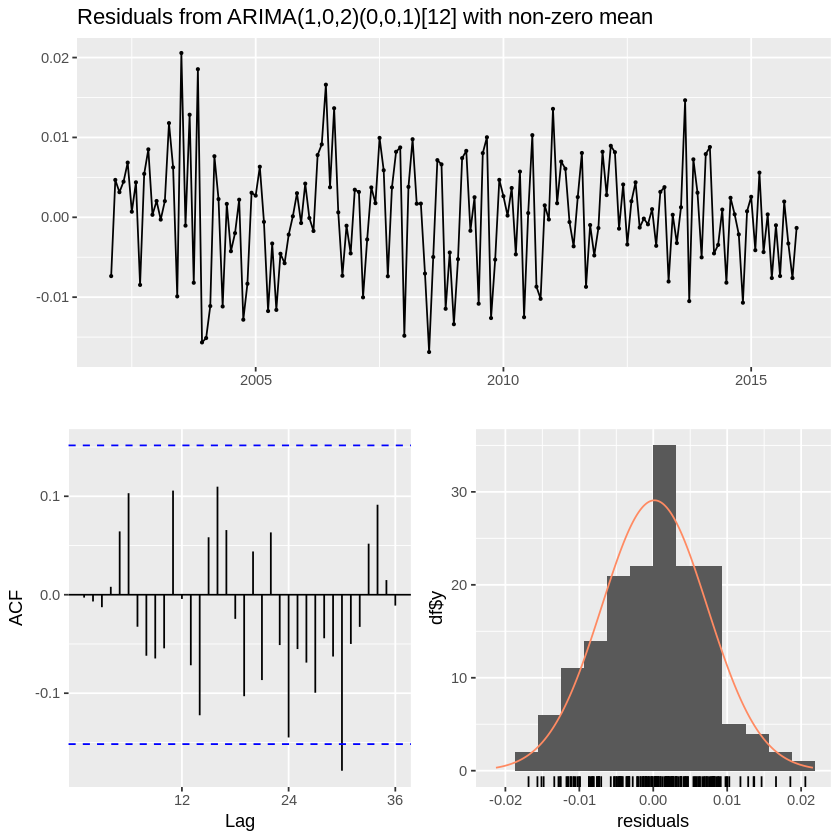

In [33]:
# Fitting ARIMA(2,0,2)(2,0,2)[12] model
model <- Arima(chicken.diff, order = c(2,0,2), seasonal = list(order = c(2,0,2), period = 12))

# Extract residuals
residuals_model <- residuals(model)

# Ljung-Box test at lag 12
Box.test(residuals_model, lag = 12, type = "Ljung-Box")

# Automated residual diagnostics
checkresiduals(model)


initial  value -4.228199 
iter   2 value -4.639833
iter   3 value -4.873971
iter   4 value -4.894648
iter   5 value -4.899547
iter   6 value -4.903348
iter   7 value -4.905205
iter   8 value -4.906673
iter   9 value -4.907210
iter  10 value -4.907298
iter  11 value -4.907305
iter  12 value -4.907314
iter  13 value -4.907315
iter  14 value -4.907315
iter  15 value -4.907316
iter  16 value -4.907316
iter  16 value -4.907316
iter  16 value -4.907316
final  value -4.907316 
converged
initial  value -4.897169 
iter   2 value -4.899629
iter   3 value -4.900133
iter   4 value -4.900447
iter   5 value -4.900454
iter   6 value -4.900458
iter   7 value -4.900460
iter   8 value -4.900462
iter   9 value -4.900462
iter   9 value -4.900463
iter   9 value -4.900463
final  value -4.900463 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
      Estimate     SE  t.value p.value
ar1     0.4404 0.1305   3.3741  0.0009
ma1     0.4666 0.1334   3.4977  0.0006
ma2     0.2475 0.1080   2.2908  0.0233
sma

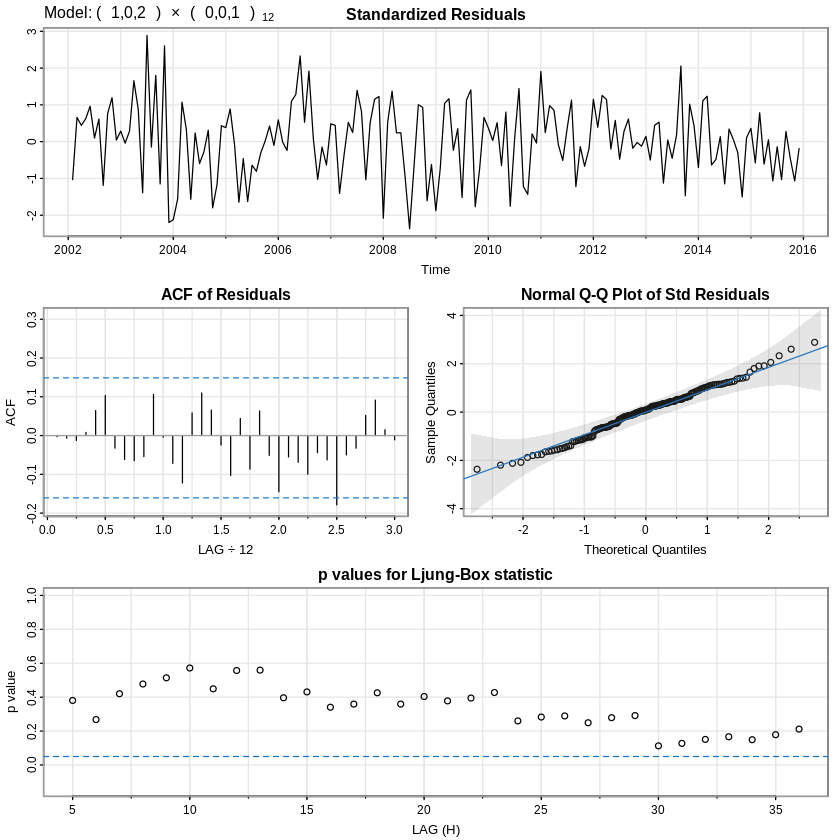

In [40]:
X1<-sarima(chicken.diff1, 1,0,2,0,0,1,12)$fit$resid
LBtest=NULL
for (H in 3:36){
  LBtest[H] = Box.test(X1, fitdf=2, lag=H, type="Ljung-Box")$p.value
}



	Box-Ljung test

data:  residuals_model1
X-squared = 3.888, df = 12, p-value = 0.9854



	Ljung-Box test

data:  Residuals from ARIMA(2,0,2)(2,0,2)[12] with non-zero mean
Q* = 16.373, df = 16, p-value = 0.4273

Model df: 8.   Total lags used: 24



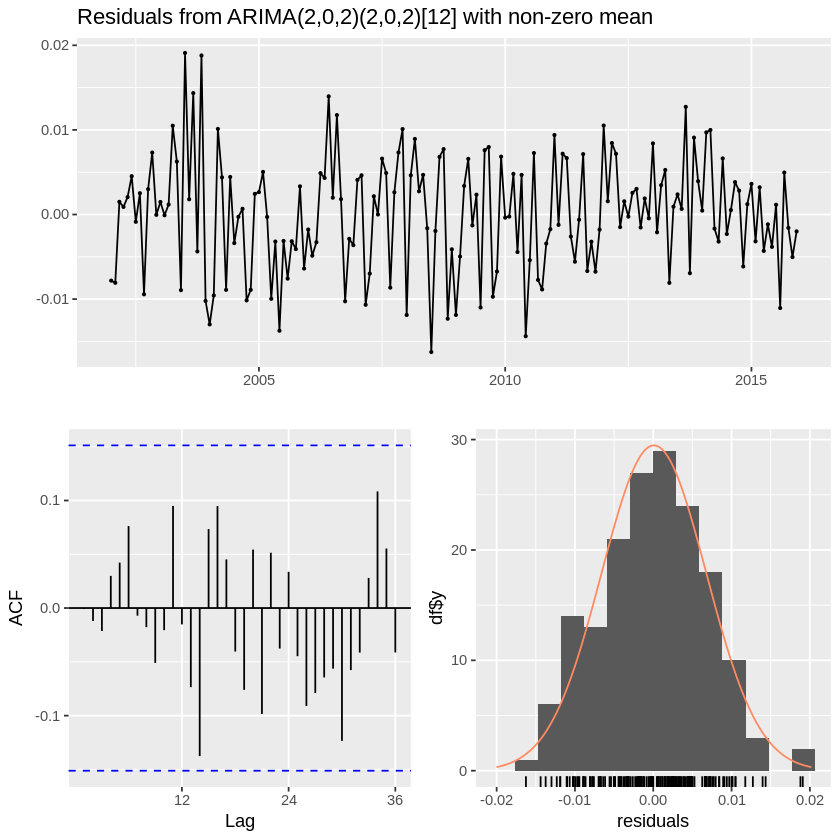

In [36]:
# Fitting ARIMA(1,0,2)(0,0,1)[12] model
model1 <- Arima(chicken.diff, order = c(2,0,2), seasonal = list(order = c(2,0,2), period = 12))

# Extract residuals
residuals_model1 <- residuals(model1)

# Ljung-Box test at lag 12
Box.test(residuals_model1, lag = 12, type = "Ljung-Box")

# Automated residual diagnostics
checkresiduals(model1)



	Box-Ljung test

data:  residuals_model_org
X-squared = 11.71, df = 12, p-value = 0.4692



	Ljung-Box test

data:  Residuals from ARIMA(2,1,0)(2,0,0)[12]
Q* = 23.758, df = 20, p-value = 0.2531

Model df: 4.   Total lags used: 24



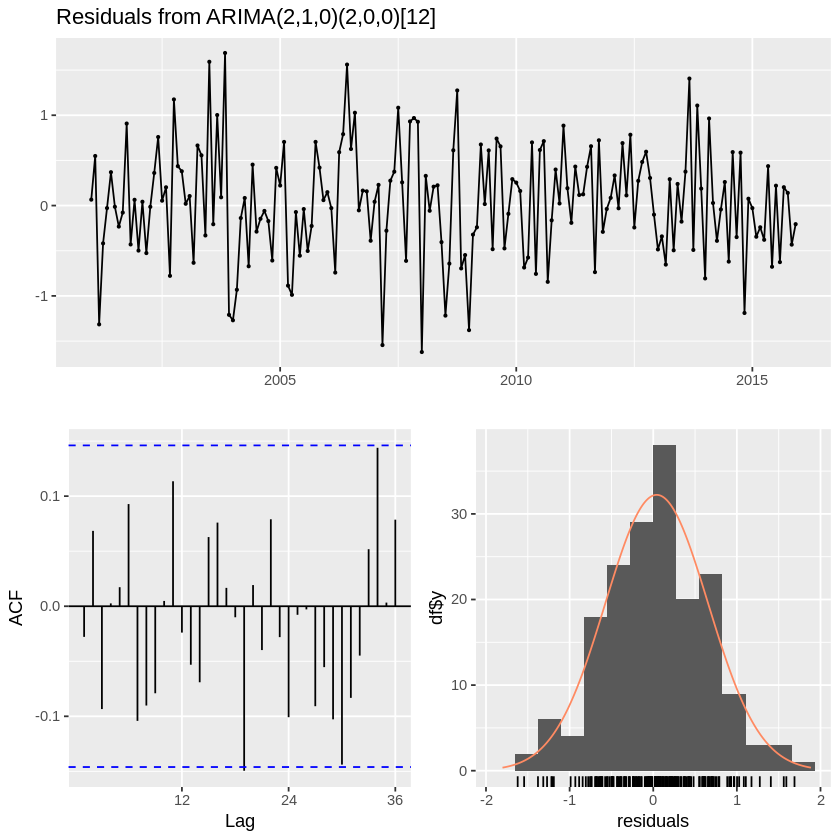

In [37]:
# Fitting ARIMA(1,0,2)(0,0,1)[12] model
model_org <- Arima(chicken.ts, order = c(2,1,0), seasonal = list(order = c(2,0,0), period = 12))

# Extract residuals
residuals_model_org <- residuals(model_org)

# Ljung-Box test at lag 12
Box.test(residuals_model_org, lag = 12, type = "Ljung-Box")

# Automated residual diagnostics
checkresiduals(model_org)
